<a href="https://www.kaggle.com/abdalrhmanmorsi/clustering-fifa-18sample-data?scriptVersionId=88488906" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import pylab as pl

# Read the Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Mohamed-ElhajAbdou/Kmeans_Clustering/main/fifa_18_sample_data.csv")
df.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [3]:
X= df.iloc[:, [5, 6]].values
X

array([[2228,   32],
       [2158,   30],
       [2100,   25],
       ...,
       [2005,   34],
       [1206,   28],
       [1754,   23]])

# DB-Scan Clustering

In [4]:
# Compute DBSCAN
dbSCAN_Model = DBSCAN(eps=22, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(dbSCAN_Model.labels_, dtype=bool)
core_samples_mask[dbSCAN_Model.core_sample_indices_] = True
labels = dbSCAN_Model.labels_

In [5]:
labels_custers=dbSCAN_Model.labels_
set(labels_custers)

{-1, 0, 1}

In [6]:
labels = dbSCAN_Model.labels_
labels

array([ 0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0, -1,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0, -1,  0

In [7]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

In [8]:
n_noise_ = list(labels).count(-1)
n_noise_

25

In [9]:
percentage_of_Outlaiers=n_noise_/len(X)
percentage_of_Outlaiers*100

2.5

In [10]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 25


After some attempts, it turns out that the appropriate value of clusters is 2

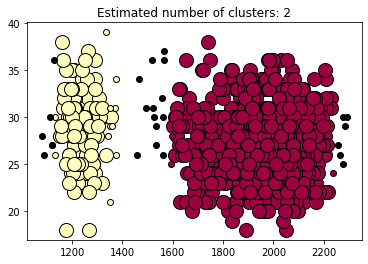

In [11]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Kmeans Clustering

Cost_Function= 70916826.70000008 with 1 Clusters
Cost_Function= 16992213.299003325 with 2 Clusters
Cost_Function= 6996748.548847648 with 3 Clusters
Cost_Function= 3639582.5714619574 with 4 Clusters
Cost_Function= 2381446.1753409803 with 5 Clusters
Cost_Function= 1811241.0649580364 with 6 Clusters
Cost_Function= 1418139.4215774045 with 7 Clusters
Cost_Function= 1091674.762087782 with 8 Clusters
Cost_Function= 860318.7090009206 with 9 Clusters
Cost_Function= 697104.3764272665 with 10 Clusters


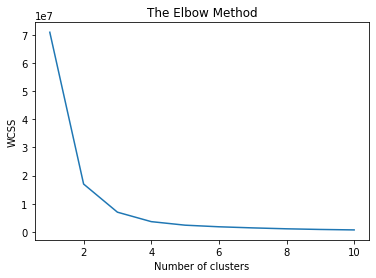

In [12]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    print('Cost_Function=',kmeans.inertia_,'with', i, 'Clusters')
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

the best number of clusters is 3 or 4, and we will choose 3

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

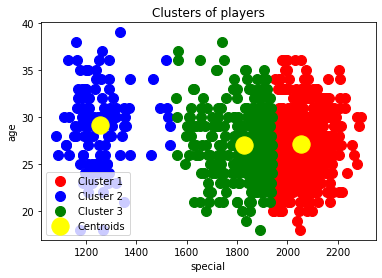

In [14]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of players')
plt.xlabel('special')
plt.ylabel('age')
plt.legend()
plt.show()

# H Clustering

We will try the different methods of linkage

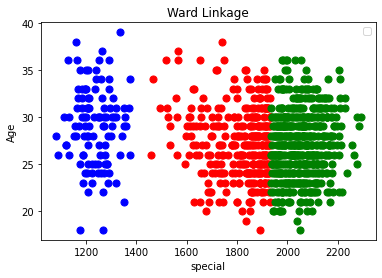

In [15]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green')

plt.title('Ward Linkage')
plt.xlabel('special')
plt.ylabel('Age')
plt.legend()
plt.show()

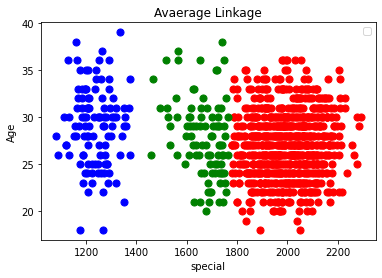

In [16]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green')

plt.title('Avaerage Linkage')
plt.xlabel('special')
plt.ylabel('Age')
plt.legend()
plt.show()

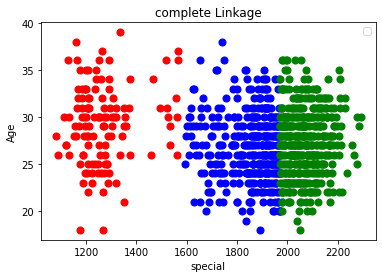

In [17]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green')

plt.title('complete Linkage')
plt.xlabel('special')
plt.ylabel('Age')
plt.legend()
plt.show()

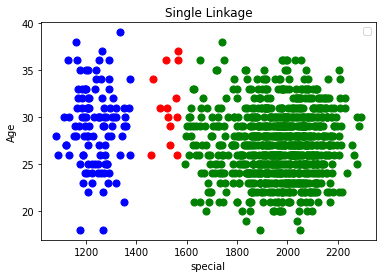

In [18]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green')

plt.title('Single Linkage')
plt.xlabel('special')
plt.ylabel('Age')
plt.legend()
plt.show()

We can choose the 'word' method as the best one.

# Comparing different clustering algorithms

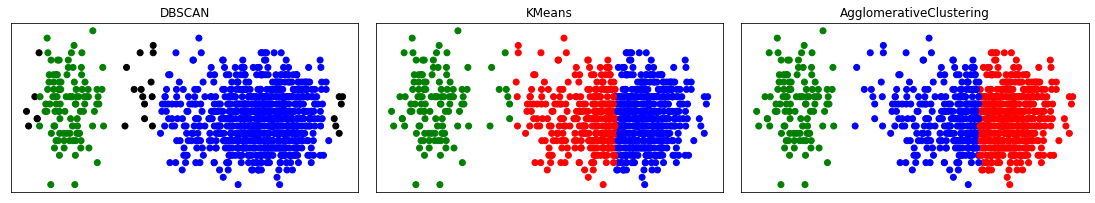

In [19]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 10)

pl.figure(figsize=(15, 2.5))
pl.subplots_adjust(left=.001, right=.999, bottom=.01, top=.95, wspace=.05,
        hspace=.01)

plot_num = 1

# create clustering estimators
dbscan = DBSCAN(eps=22,min_samples=10)
two_means =KMeans(n_clusters = 3, init = 'k-means++')
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')


for algorithm in [dbscan, two_means ,hc]:

        algorithm.fit(X)
        y_pred = algorithm.labels_.astype(np.int)

        # plot
        pl.subplot(1, 3, plot_num)
        pl.title(str(algorithm).split('(')[0])
        pl.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist())


        pl.xticks(())
        pl.yticks(())
        plot_num += 1

pl.show()